In [1]:
import numpy as np
import pandas as pd
# To plot pretty figures
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset and basic cleaning

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/StatewiseTestingDetails.csv')
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
8061,2020-12-04,West Bengal,6047279.0,NaN,NaN
8062,2020-12-05,West Bengal,6091668.0,NaN,NaN
8063,2020-12-06,West Bengal,6135854.0,NaN,NaN
8064,2020-12-07,West Bengal,6167307.0,NaN,NaN


In [3]:
df = df[df['State'] == 'Kerala']

In [4]:
df

,Date,State,TotalSamples,Negative,Positive
3743,2020-04-01,Kerala,7965.0,7256,265.0
3744,2020-04-02,Kerala,8456.0,7622,286.0
3745,2020-04-03,Kerala,9139.0,8126,295.0
3746,2020-04-04,Kerala,9744.0,8586,306.0
3747,2020-04-05,Kerala,10221.0,9300,314.0
...,...,...,...,...,...
3990,2020-12-04,Kerala,6496210.0,NaN,625769.0
3991,2020-12-05,Kerala,6556713.0,NaN,631617.0
3992,2020-12-06,Kerala,6608606.0,NaN,636394.0
3993,2020-12-07,Kerala,6642364.0,NaN,639666.0


In [5]:
df.shape

(252, 5)

In [6]:
df.drop(['Date','State','Negative'],axis=1,inplace=True)
df

,TotalSamples,Positive
3743,7965.0,265.0
3744,8456.0,286.0
3745,9139.0,295.0
3746,9744.0,306.0
3747,10221.0,314.0
...,...,...
3990,6496210.0,625769.0
3991,6556713.0,631617.0
3992,6608606.0,636394.0
3993,6642364.0,639666.0


In [7]:
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1]

Plotting for basic data


Text(0.5, 1.0, 'COVID Week 3 - India')

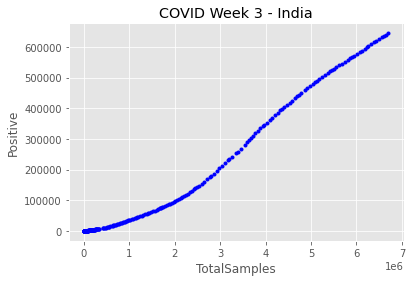

In [8]:
plt.style.use(['ggplot'])
plt.plot(X,y,'b.')
plt.xlabel('TotalSamples')
plt.ylabel('Positive')
plt.title('COVID Week 3 - India')


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state=1)

In [10]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)

iNTERCEPT :  -31848.301260488603
CO-EFFICIENT :  [0.09579981]


In [11]:
y_pred = linreg.predict(X_test)

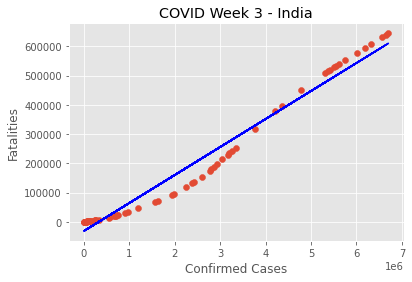

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='blue')
plt.xlabel('Confirmed Cases')
plt.ylabel('Fatalities')
plt.title('COVID Week 3 - India')
plt.show()

Coefficients: 
 [0.09579981]
Variance score: 0.973692797374323


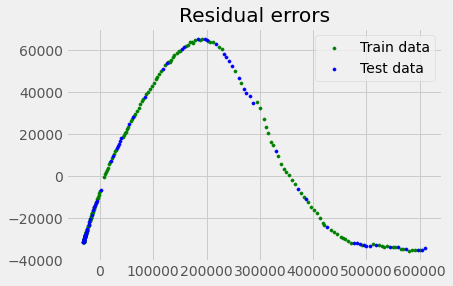

In [13]:


# regression coefficients 
print('Coefficients: \n', linreg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(linreg.score(X_test, y_test))) 
  
# plot for residual error 

plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(linreg.predict(X_train), linreg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(linreg.predict(X_test), linreg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 


plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

## Metrics:


#### The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.
### MAE (Mean absolute error):
represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
### MSE (Mean Squared Error):
 represents the difference between the original and predicted values extracted by squared the average difference over the data set.
### RMSE (Root Mean Squared Error):
 is the error rate by the square root of MSE.
### R-squared (Coefficient of determination):
 represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [14]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.973692797374323


mean_absolute_error : 31259.666311447847


mean_squared_error :  1198170590.645516


root_mean_squared_error :  34614.600830365154


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              


underfitting_learning_curves_plot


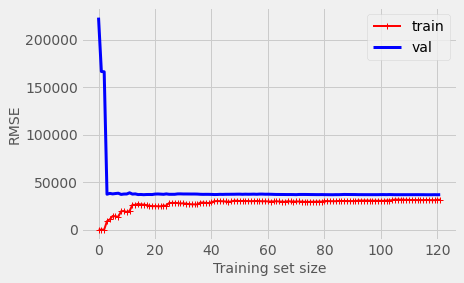

In [16]:
lin_reg = LinearRegression()
print("underfitting_learning_curves_plot")
plot_learning_curves(lin_reg, X_train, y_train)

                      
plt.show() 

#### Ridge:

In [17]:
# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.8, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(X_train, y_train).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(X_train, y_train).best_score_)

The best value of alpha is: {'alpha': 0.2}
The best score for the best Ridge estimator is: -1131401598.923214


In [18]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.2, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9462282228726128


mean_absolute_error : 34751.52845901403


mean_squared_error :  2449054081.405687


root_mean_squared_error :  49487.91853983846


In [19]:
# examing the coefficients
print(ridgereg.coef_)

[0.07983317]


underfitting_learning_curves_plot


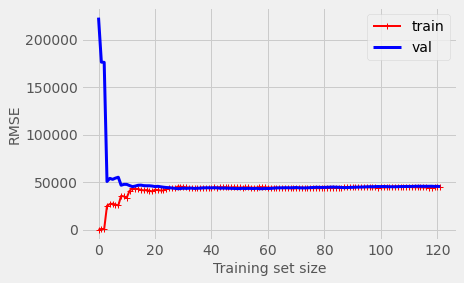

In [20]:
          
lin_reg = Ridge(alpha=0.2, normalize=True)
print("underfitting_learning_curves_plot")
plot_learning_curves(lin_reg, X_train, y_train)
plt.show() 

#### Lasso:

In [21]:
# importing the Lasso class from linear_model submodule of scikit learn
from sklearn.linear_model import Lasso
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.8, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Lasso estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
lasso= GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(X_train, y_train).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(X_train, y_train).best_score_)

The best value of alpha is: {'alpha': 0.2}
The best score for the best Ridge estimator is: -1131401598.923214


In [22]:
# try alpha=0.2 and examine coefficients
lassoreg = Lasso(alpha=0.2, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[0.09579849]


In [23]:
y_pred = lassoreg.predict(X_test)

In [24]:
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9736927786184109


mean_absolute_error : 31259.6996181533


mean_squared_error :  1198171444.8899868


root_mean_squared_error :  34614.61316972915


underfitting_learning_curves_plot


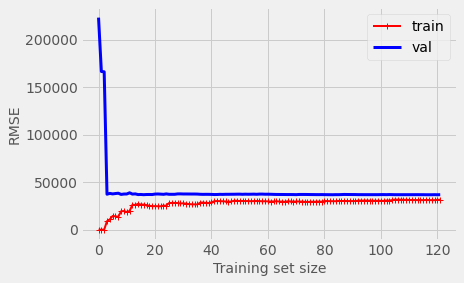

In [25]:
         
lin_reg = Lasso(alpha=0.2, normalize=True)
print("underfitting_learning_curves_plot")
plot_learning_curves(lin_reg, X_train, y_train)

                      
plt.show() 

#### Stochastic Gradient Descend:

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_train, y_train.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [27]:
y_pred = sgd_reg.predict(X_test)

In [28]:
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -2.2468272395210758e+35


mean_absolute_error : 6.731219556847383e+22


mean_squared_error :  1.023325193089063e+46


root_mean_squared_error :  1.0115953702390413e+23


underfitting_learning_curves_plot


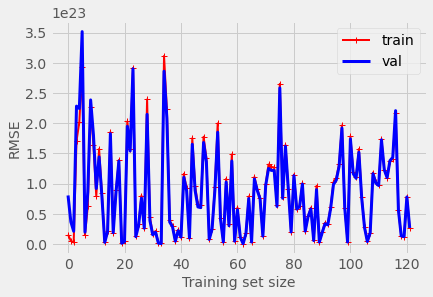

In [31]:
         
lin_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
print("underfitting_learning_curves_plot")
plot_learning_curves(lin_reg, X_train, y_train)

                      
plt.show() 

## POLYNOMIAL REGRESSION

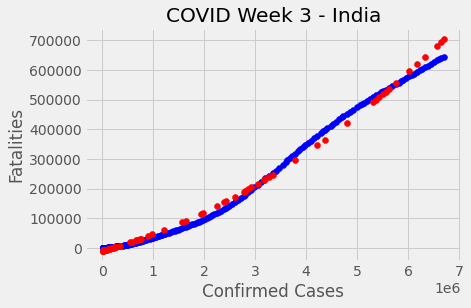

In [43]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) 
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 

# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
plt.scatter(X_test,lin2.predict(poly.fit_transform(X_test)),color="red") 
#plt.plot(X_test, , color = 'red') 
plt.xlabel('Confirmed Cases')
plt.ylabel('Fatalities')
plt.title('COVID Week 3 - India')
  
plt.show() 

In [44]:
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,lin2.predict(poly.fit_transform(X_test))))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, lin2.predict(poly.fit_transform(X_test)) ))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, lin2.predict(poly.fit_transform(X_test)) ))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, lin2.predict(poly.fit_transform(X_test)) )))

R-Square Value 0.9934888812656526


mean_absolute_error : 12662.459677211102


mean_squared_error :  296551141.9325757


root_mean_squared_error :  17220.660322199485


learning_curves_plot


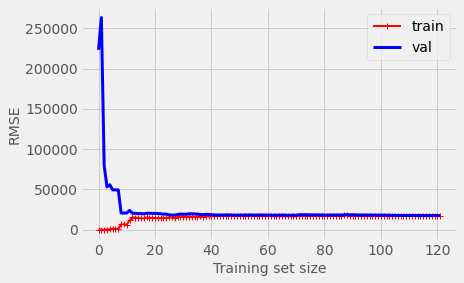

In [45]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X_train, y_train)
print("learning_curves_plot")   
plt.show()                      

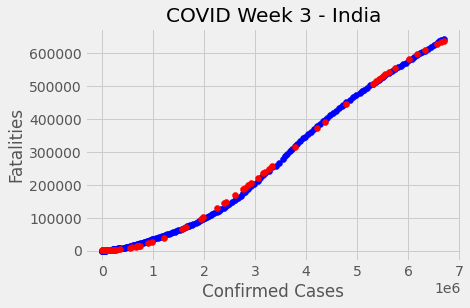

In [46]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X_train) 
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 

# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
plt.scatter(X_test,lin2.predict(poly.fit_transform(X_test)),color="red") 
#plt.plot(X_test, , color = 'red') 
plt.xlabel('Confirmed Cases')
plt.ylabel('Fatalities')
plt.title('COVID Week 3 - India')
  
plt.show() 

In [47]:
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,lin2.predict(poly.fit_transform(X_test))))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, lin2.predict(poly.fit_transform(X_test)) ))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, lin2.predict(poly.fit_transform(X_test)) ))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, lin2.predict(poly.fit_transform(X_test)) )))

R-Square Value 0.9993479928691219


mean_absolute_error : 4269.312151267478


mean_squared_error :  29695889.001392428


root_mean_squared_error :  5449.393452614009


learning_curves_plot


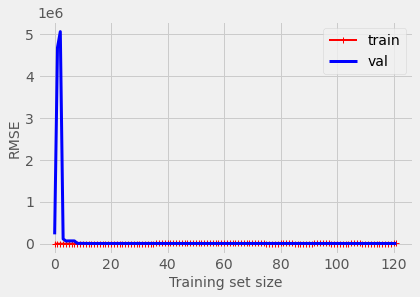

In [48]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X_train, y_train)
print("learning_curves_plot")   
plt.show()                      

## SVR


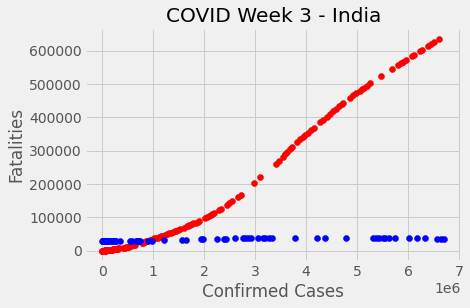

In [33]:
from sklearn.svm import SVR
regressor = SVR(degree=3, C=100, epsilon=.01)
regressor.fit(X_train, y_train)
plt.scatter(X_train, y_train, color = 'red')
y_pred = regressor.predict(X_test)
plt.scatter(X_test,y_pred, color = 'blue')
plt.xlabel('Confirmed Cases')
plt.ylabel('Fatalities')
plt.title('COVID Week 3 - India')
plt.show()

We need standard scaling here as we can see the issue iin the above diagram.

In [50]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.values.reshape(-1,1))
X_test = sc_X.fit_transform(X_test)

#### Poly:

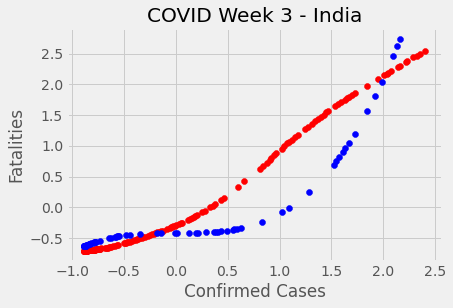

In [51]:
from sklearn.svm import SVR

regressor = SVR(kernel='poly')
regressor.fit(X_train,y_train)

plt.scatter(X_train, y_train, color = 'red')
y_pred = regressor.predict(X_test)
plt.scatter(X_test,y_pred, color = 'blue')
plt.xlabel('Confirmed Cases')
plt.ylabel('Fatalities')
plt.title('COVID Week 3 - India')
plt.show()

underfitting_learning_curves_plot


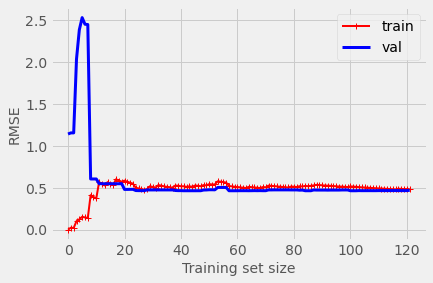

In [52]:
         
svr_reg = SVR(kernel='poly')
print("underfitting_learning_curves_plot")
plot_learning_curves(svr_reg, X_train, y_train)

In [13]:
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -0.26834009028425143


mean_absolute_error : 149773.3327729067


mean_squared_error :  57766985594.73541


root_mean_squared_error :  240347.63488483804


#### Linear:

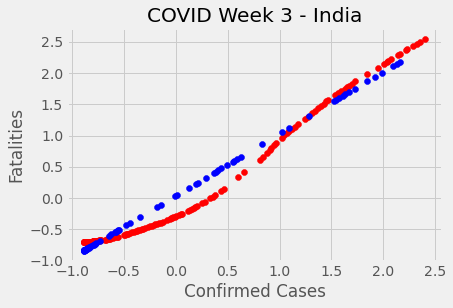

In [53]:
from sklearn.svm import SVR

regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)

plt.scatter(X_train, y_train, color = 'red')
y_pred = regressor.predict(X_test)
plt.scatter(X_test,y_pred, color = 'blue')
plt.xlabel('Confirmed Cases')
plt.ylabel('Fatalities')
plt.title('COVID Week 3 - India')
plt.show()

underfitting_learning_curves_plot


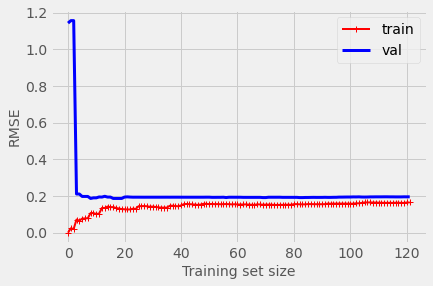

In [54]:
         
svr_reg = SVR(kernel='linear')
print("underfitting_learning_curves_plot")
plot_learning_curves(svr_reg, X_train, y_train)

In [15]:
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -4.874370947187697


mean_absolute_error : 354878.3595295568


mean_squared_error :  267550244988.52856


root_mean_squared_error :  517252.5930225276


#### RBF:

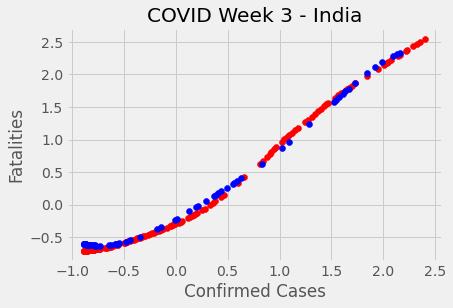

In [55]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

plt.scatter(X_train, y_train, color = 'red')
y_pred = regressor.predict(X_test)
plt.scatter(X_test,y_pred, color = 'blue')
plt.xlabel('Confirmed Cases')
plt.ylabel('Fatalities')
plt.title('COVID Week 3 - India')
plt.show()

underfitting_learning_curves_plot


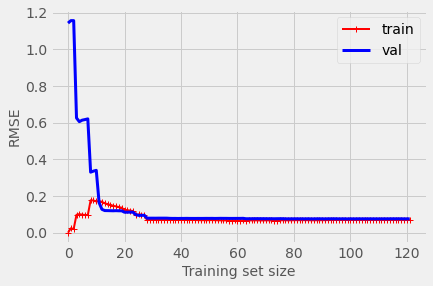

In [56]:
svr_reg = SVR(kernel='rbf')
print("underfitting_learning_curves_plot")
plot_learning_curves(svr_reg, X_train, y_train)

In [17]:
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -0.357133694491627


mean_absolute_error : 153934.86717720615


mean_squared_error :  61811120834.521576


root_mean_squared_error :  248618.42416547003
